In [1]:
import numpy as np

# This magic just sets up matplotlib's interactive mode
%matplotlib inline
# So you have to explicitely import the module into the namespace
import matplotlib.pyplot as plt

def ordinary_verlet(xt, xt_1, dt, k, m):
    return 2*xt - xt_1 + (dt**2)*xt*-k/m, xt

def OV_operator_SHO(xt, xt_1, xt_2):
    return 2*xt - xt_1 + xt*(xt-2*xt_1+xt_2)/xt_1, xt, xt_1

def velocity_verlet(xt, vt, dt, k, m):
    xt_1 = xt + dt*vt + (dt**2)/2*xt*-k/m
    vt_1 = vt + dt/2*-k/m*( xt + xt_1)
    return xt_1, vt_1

def VV_operator_SHO(xt, xt_1, vt, vt_1, dt):
    xt1 = xt + dt*vt + xt*(xt-xt_1-dt*vt_1)/(xt_1)
    vt1 = vt + ( xt + xt1)* (vt-vt_1)/( xt_1 + xt)
    return xt1, xt, vt1, vt

def velocity_verlet2(xt, vt, dt, k, m):
    vt_12 = vt + dt/2*-k/m*xt 
    xt_1 = xt + dt*vt_12 
    vt_1 = vt_12 + dt/2*-k/m*xt_1
    return xt_1, vt_1

def exact_solution(x0, k, m, t):
    return x0*np.cos(np.sqrt(k/m)*t)


VV error: 7.524391106803339
OV error: 7.466102439694204
OV_operator error: 1.0616812661195188e-24
VV_operator error: 50.69769575139788


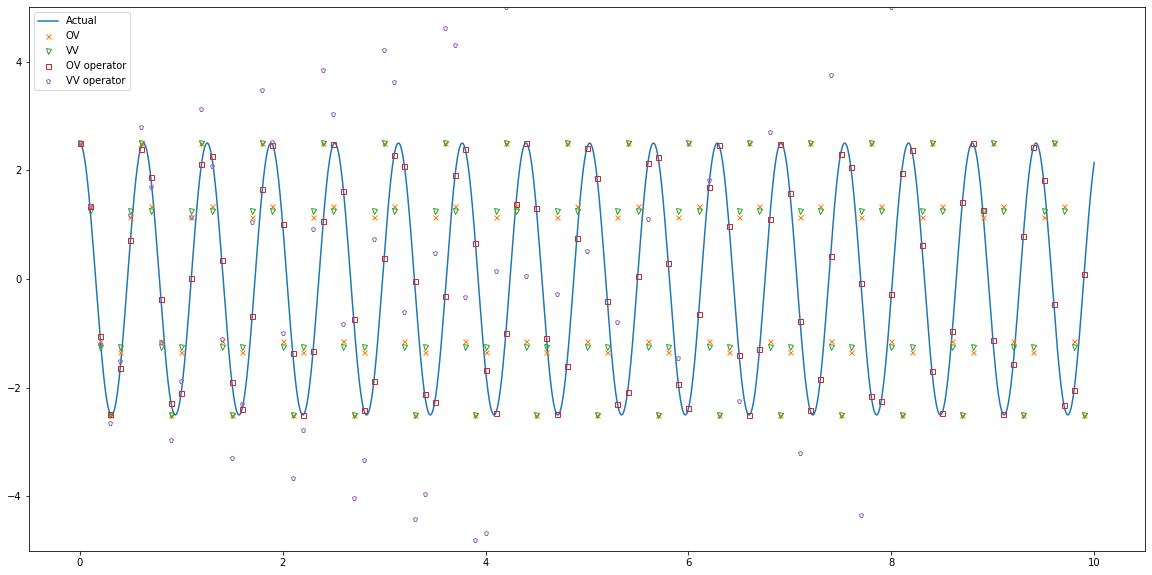

In [2]:
k=100
m=1
dt=0.1

x0=2.5
v0=0.0

total_time= 10

time_conti = np.arange(0, total_time, 0.001)

exact_result_conti = exact_solution(x0, k, m, time_conti)


time = np.arange(0, total_time, dt)

exact_result = exact_solution(x0, k, m, time)

#x1= x0 + v0*dt -k/m*(dt**2)/2*x0
x1=exact_result[1]

iterations = int(total_time/dt)

ov_array = np.array([x0, x1])

for i in range(iterations-2):
    x1, x0 = ordinary_verlet(x1, x0, dt, k, m)
    ov_array= np.append(ov_array,x1)
    
x0=exact_result[0]
vv_array = np.array([x0])

for i in range(iterations-1):
    x0, v0 = velocity_verlet(x0, v0, dt, k, m)
    vv_array= np.append(vv_array,x0)
 

x0=2.5
v0=0.0
x1= exact_result[1]
x2= exact_result[2]

ov_op_array = np.array([x0, x1, x2])

for i in range(iterations-3):
    x2, x1, x0 = OV_operator_SHO(x2, x1, x0)
    ov_op_array= np.append(ov_op_array,x2)
    

x0=2.5
v0=0.0
x1= exact_result[1]
v1=v0 + dt/2*(-k/m)*(x0+x1)
vv_op_array = np.array([x0, x1])

for i in range(iterations-2):
    x1, x0, v1, v0 = VV_operator_SHO(x1, x0, v1, v0, dt)
    vv_op_array= np.append(vv_op_array,x1)
    

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(time_conti, exact_result_conti, label='Actual')
plt.plot(time, ov_array, label='OV',marker='x', ms=5, markerfacecolor="None",linestyle='None')
plt.plot(time, vv_array, label='VV',marker='v', ms=5, markerfacecolor="None",linestyle='None')
plt.plot(time,ov_op_array, label='OV operator',marker='s', ms=5, markerfacecolor="None",linestyle='None')
plt.plot(time,vv_op_array, label='VV operator',marker='p', ms=5, markerfacecolor="None",linestyle='None')
plt.ylim(-5,5)
plt.legend()

print("VV error: "+str(np.mean((vv_array-exact_result)**2)))
print("OV error: "+str(np.mean((ov_array-exact_result)**2)))
print("OV_operator error: "+str(np.mean((ov_op_array-exact_result)**2)))
print("VV_operator error: "+str(np.mean((vv_op_array-exact_result)**2)))


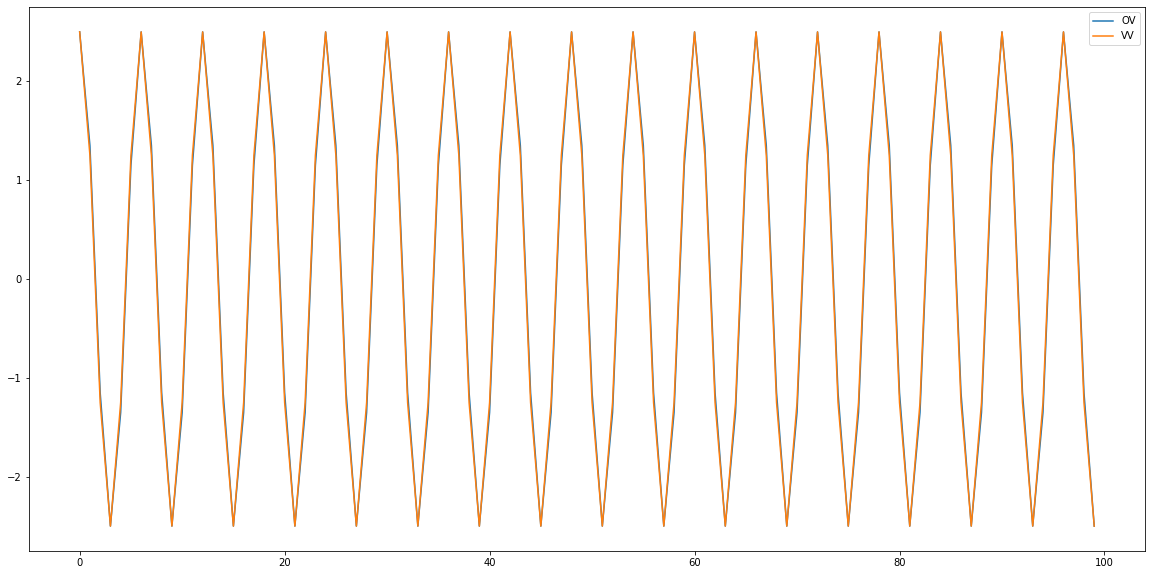

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(ov_array, label='OV')
plt.plot(vv_array, label='VV')
#plt.plot(v_op_array, label='V operator')
plt.legend()

In [4]:
print("VV error: "+str(np.sum((vv_array-exact_result)**2)))
print("OV error: "+str(np.sum((ov_array-exact_result)**2)))
print("OV_operator error: "+str(np.sum((ov_op_array-exact_result)**2)))


VV error: 752.4391106803339
OV error: 746.6102439694204
OV_operator error: 1.061681266119519e-22
